In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import re
import io
import string
from sklearn.metrics import roc_auc_score,roc_curve
from matplotlib import pyplot as plt


In [2]:
# raw = pd.read_csv('jigsaw-toxic-comment-train.csv')

In [3]:
# clean = []
# for elem in raw.comment_text:
#   #remove ip address
#   elem = re.sub( r'[0-9]+(?:\.[0-9]+){3}','', elem )
#   #remove url
#   elem = re.sub(r'^https?:\/\/.*[\r\n]*', '', elem)
#   #remove tab/newline
#   elem = re.sub(r'[\n\t]',' ',elem)
#   #remove punctuation
#   elem = elem.translate(elem.maketrans("","",string.punctuation))
#   #remove multiple space
#   elem = re.sub(r'[ ]{2,}',' ',elem)
#   clean.append(elem)

In [4]:
# train = raw
# train.drop("comment_text", axis=1, inplace = True)
# train["comment_text"] = clean

In [5]:
# train = train.set_index('id')

In [6]:
train = pd.read_csv('clean_new_train.csv')

In [7]:
train

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
0,43346,73b77bbc3fd5f2e6,listas Henke Brad William,0,0,0,0,0,0,0
1,30221,503848e8a9f376fa,Good job Its now much better referenced I move...,0,0,0,0,0,0,0
2,198074,999f2b6f546d0199,I swear I scoured the talk help pages for the ...,0,0,0,0,0,0,0
3,40765,6ccc5301a9e456da,Tax Document from Vector Marketing Hi 72Dino I...,0,0,0,0,0,0,0
4,147574,3ebba7ac63bb771e,Time to unprotect Banjo Paterson Its been thre...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44931,123780,9622c82f97eb26cd,She is a Motherfucker I will block you Motherf...,1,1,1,1,1,1,6
44932,29966,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1,6
44933,38576,66f0a9006c188820,fuck you honkey why you hatin on blacks You fu...,1,1,1,1,1,1,6
44934,67240,b3e7b8a6ea14ddc5,YOURE A FRREAKING JEW AND PLEAZE COMMIT SUICIDE,1,1,1,1,1,1,6


In [8]:
#I getting this frome stackoverflow  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(10, 6))
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, origin = 'lower')
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Random Forest

### For Toxic

In [9]:
y_columns = "toxic"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [10]:
TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

In [11]:
x_train,y_train

(<35948x84036 sparse matrix of type '<class 'numpy.float64'>'
 	with 746931 stored elements in Compressed Sparse Row format>, 28982    1
 12146    0
 29982    1
 34467    1
 8508     0
         ..
 18133    0
 29705    1
 7146     0
 38602    1
 6625     0
 Name: toxic, Length: 35948, dtype: int64)

In [12]:
clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
random_forest_train = confusion_matrix(y_train, y_pred)
random_forest_accuracy = accuracy_score(y_train, y_pred)


[[18776    53]
 [  306 16813]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18829
           1       1.00      0.98      0.99     17119

    accuracy                           0.99     35948
   macro avg       0.99      0.99      0.99     35948
weighted avg       0.99      0.99      0.99     35948



In [14]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

random_forest_test = confusion_matrix(y_test, y_pred)
random_forest_accuracy = accuracy_score(y_test, y_pred)

[[4249  474]
 [1036 3229]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4723
           1       0.87      0.76      0.81      4265

    accuracy                           0.83      8988
   macro avg       0.84      0.83      0.83      8988
weighted avg       0.84      0.83      0.83      8988



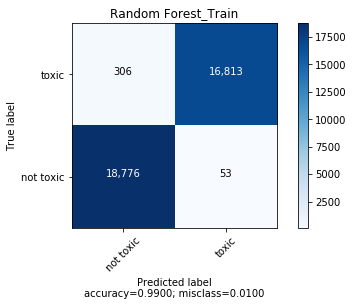

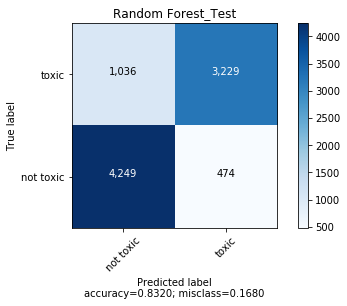

In [15]:
labels = ['not toxic', 'toxic']
plot_confusion_matrix(random_forest_train, labels, title='Random Forest_Train',cmap=None, normalize=False)
plot_confusion_matrix(random_forest_test, labels, title='Random Forest_Test',cmap=None, normalize=False)

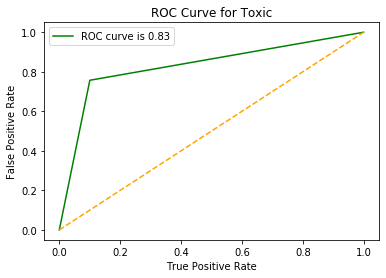

In [16]:

roc_auc=roc_auc_score(y_test, y_pred)
tpr, fpr, a = roc_curve(y_test, y_pred)

plt.plot(tpr, fpr, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Toxic')
plt.legend()

### For severe_toxic

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[34363     8]
 [  291  1286]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34371
           1       0.99      0.82      0.90      1577

    accuracy                           0.99     35948
   macro avg       0.99      0.91      0.95     35948
weighted avg       0.99      0.99      0.99     35948

[[8583   20]
 [ 360   25]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8603
           1       0.56      0.06      0.12       385

    accuracy                           0.96      8988
   macro avg       0.76      0.53      0.55      8988
weighted avg       0.94      0.96      0.94      8988



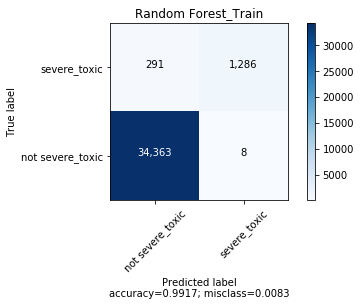

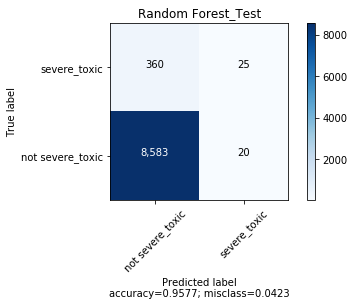

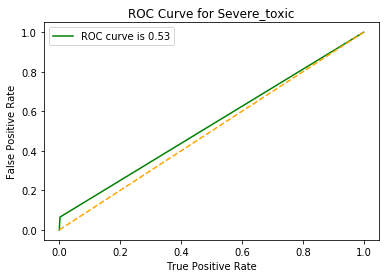

In [17]:
y_columns = "severe_toxic"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

# scores = cross_val_score(clf, x_train, y_train)
# scores.mean()

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

random_forest_train = confusion_matrix(y_train, y_pred)
random_forest_accuracy = accuracy_score(y_train, y_pred)

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

random_forest_test = confusion_matrix(y_test, y_pred)
random_forest_accuracy = accuracy_score(y_test, y_pred)

labels = ['not severe_toxic', 'severe_toxic']
plot_confusion_matrix(random_forest_train, labels, title='Random Forest_Train',cmap=None, normalize=False)
plot_confusion_matrix(random_forest_test, labels, title='Random Forest_Test',cmap=None, normalize=False)

roc_auc=roc_auc_score(y_test, y_pred)
tpr1, fpr1, a= roc_curve(y_test, y_pred)

plt.plot(tpr1, fpr1, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Severe_toxic')
plt.legend()

### For obscene

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[26218    35]
 [  322  9373]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26253
           1       1.00      0.97      0.98      9695

    accuracy                           0.99     35948
   macro avg       0.99      0.98      0.99     35948
weighted avg       0.99      0.99      0.99     35948

[[6317  226]
 [ 954 1491]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      6543
           1       0.87      0.61      0.72      2445

    accuracy                           0.87      8988
   macro avg       0.87      0.79      0.82      8988
weighted avg       0.87      0.87      0.86      8988



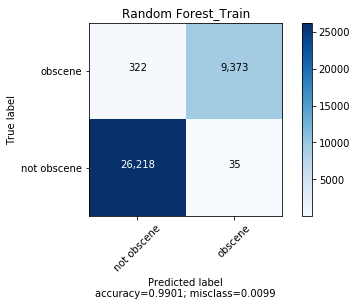

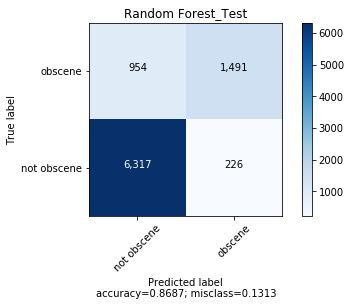

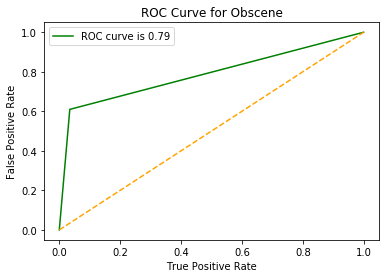

In [18]:
y_columns = "obscene"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

# scores = cross_val_score(clf, x_train, y_train)
# scores.mean()

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

random_forest_train = confusion_matrix(y_train, y_pred)
random_forest_accuracy = accuracy_score(y_train, y_pred)

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

random_forest_test = confusion_matrix(y_test, y_pred)
random_forest_accuracy = accuracy_score(y_test, y_pred)

labels = ['not obscene', 'obscene']
plot_confusion_matrix(random_forest_train, labels, title='Random Forest_Train',cmap=None, normalize=False)
plot_confusion_matrix(random_forest_test, labels, title='Random Forest_Test',cmap=None, normalize=False)


roc_auc=roc_auc_score(y_test, y_pred)
tpr2, fpr2, a = roc_curve(y_test, y_pred)

plt.plot(tpr2, fpr2, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Obscene')
plt.legend()


### For threat

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[35365     5]
 [  113   465]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35370
           1       0.99      0.80      0.89       578

    accuracy                           1.00     35948
   macro avg       0.99      0.90      0.94     35948
weighted avg       1.00      1.00      1.00     35948

[[8873    4]
 [  99   12]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8877
           1       0.75      0.11      0.19       111

    accuracy                           0.99      8988
   macro avg       0.87      0.55      0.59      8988
weighted avg       0.99      0.99      0.98      8988



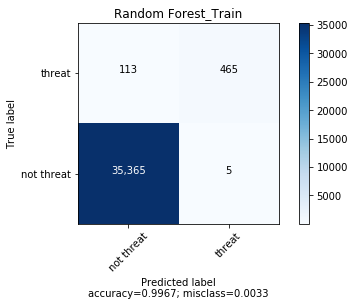

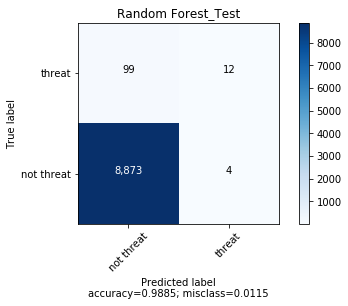

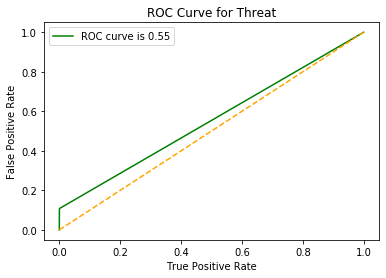

In [19]:
y_columns = "threat"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)


clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

# scores = cross_val_score(clf, x_train, y_train)
# scores.mean()

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

random_forest_train = confusion_matrix(y_train, y_pred)
random_forest_accuracy = accuracy_score(y_train, y_pred)

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

random_forest_test = confusion_matrix(y_test, y_pred)
random_forest_accuracy = accuracy_score(y_test, y_pred)

labels = ['not threat', 'threat']
plot_confusion_matrix(random_forest_train, labels, title='Random Forest_Train',cmap=None, normalize=False)
plot_confusion_matrix(random_forest_test, labels, title='Random Forest_Test',cmap=None, normalize=False)


roc_auc=roc_auc_score(y_test, y_pred)
tpr3, fpr3, a = roc_curve(y_test, y_pred)

plt.plot(tpr3, fpr3, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Threat')
plt.legend()


### For insult

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[26870    46]
 [  431  8601]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26916
           1       0.99      0.95      0.97      9032

    accuracy                           0.99     35948
   macro avg       0.99      0.98      0.98     35948
weighted avg       0.99      0.99      0.99     35948

[[6378  338]
 [1103 1169]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6716
           1       0.78      0.51      0.62      2272

    accuracy                           0.84      8988
   macro avg       0.81      0.73      0.76      8988
weighted avg       0.83      0.84      0.83      8988



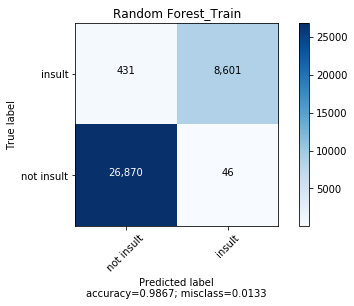

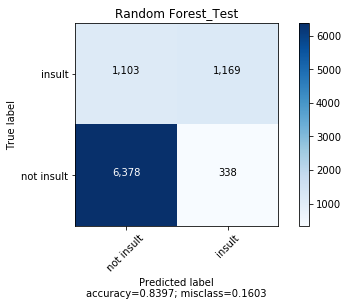

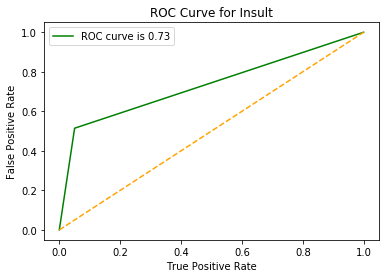

In [20]:
y_columns = "insult"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)


clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

# scores = cross_val_score(clf, x_train, y_train)
# scores.mean()

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

random_forest_train = confusion_matrix(y_train, y_pred)
random_forest_accuracy = accuracy_score(y_train, y_pred)

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

random_forest_test = confusion_matrix(y_test, y_pred)
random_forest_accuracy = accuracy_score(y_test, y_pred)

labels = ['not insult', 'insult']
plot_confusion_matrix(random_forest_train, labels, title='Random Forest_Train',cmap=None, normalize=False)
plot_confusion_matrix(random_forest_test, labels, title='Random Forest_Test',cmap=None, normalize=False)


roc_auc=roc_auc_score(y_test, y_pred)
tpr4, fpr4, thresholds = roc_curve(y_test, y_pred)

plt.plot(tpr4, fpr4, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Insult')
plt.legend()

### For Identity_hate

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[34241     6]
 [  254  1447]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34247
           1       1.00      0.85      0.92      1701

    accuracy                           0.99     35948
   macro avg       0.99      0.93      0.96     35948
weighted avg       0.99      0.99      0.99     35948

[[8550   22]
 [ 360   56]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8572
           1       0.72      0.13      0.23       416

    accuracy                           0.96      8988
   macro avg       0.84      0.57      0.60      8988
weighted avg       0.95      0.96      0.94      8988



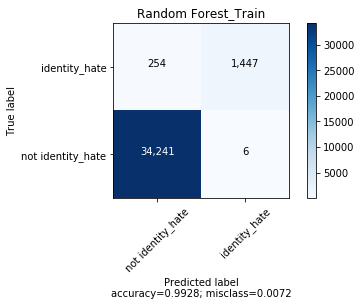

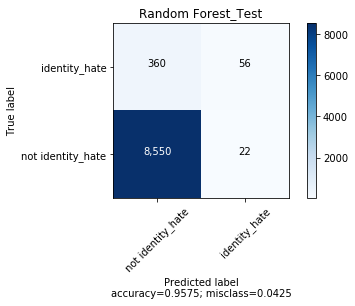

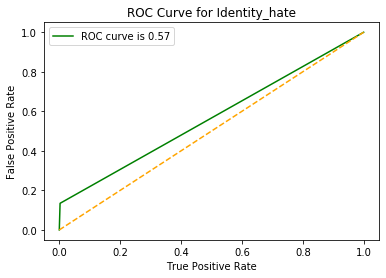

In [21]:
y_columns = "identity_hate"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)


clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)

# scores = cross_val_score(clf, x_train, y_train)
# scores.mean()

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

random_forest_train = confusion_matrix(y_train, y_pred)
random_forest_accuracy = accuracy_score(y_train, y_pred)

y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

random_forest_test = confusion_matrix(y_test, y_pred)
random_forest_accuracy = accuracy_score(y_test, y_pred)

labels = ['not identity_hate', 'identity_hate']
plot_confusion_matrix(random_forest_train, labels, title='Random Forest_Train',cmap=None, normalize=False)
plot_confusion_matrix(random_forest_test, labels, title='Random Forest_Test',cmap=None, normalize=False)

roc_auc=roc_auc_score(y_test, y_pred)
tpr5, fpr5, a = roc_curve(y_test, y_pred)

plt.plot(tpr5, fpr5, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Identity_hate')
plt.legend()


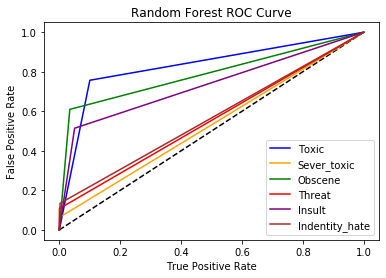

In [22]:
plt.title('Random Forest ROC Curve')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(tpr, fpr, color='blue', label="Toxic")
plt.plot(tpr1, fpr1, color='orange', label="Sever_toxic")
plt.plot(tpr2, fpr2, color='green', label="Obscene")
plt.plot(tpr3, fpr3, color='red', label="Threat")
plt.plot(tpr4, fpr4, color='purple', label="Insult")
plt.plot(tpr5, fpr5, color='brown', label="Indentity_hate")
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()

plt.savefig('1.png')
